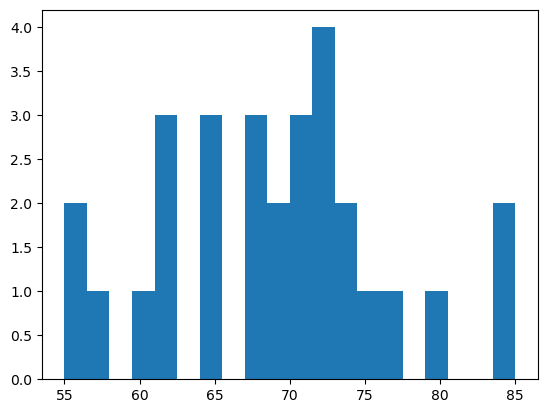

In [1]:
# One-Sample t-test
#  PROBLEM: Helen sells Choconutties. Claim: Each bar weighs 200g and contains 70g of peanuts.
#  Some customers claims there are less than 70g peanuts in Helens chocolate bars.
#  Helen wants to check that H0: the average chocolate bar DO contain 70g peanuts
#  Ha: The average weight of peanuts in a chocolate bar is NOT 70g. (Modified form the video where they say LESS THAN 70g )


from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_1samp
import numpy as np
import scipy
# "Lock" the pseudo-random number generator, to allow replicable analysis
seed(24)
# Return a sample (or samples) from the "standard normal" distribution.
meanNuts = 68.7
sdNuts = 5
n=20 # Helen takes a random sample of 20 bars (out of her stock of 400 bars)

#Known mean value to compare with, i.e. 70 grams of nuts are expected!
mu = 70  
# generate sample
dataNutsGen = sdNuts * randn(n) + meanNuts
dataNuts = (55,70,55,68,64,67,57,68,65,85,69,85,62,72,72,75,65,62,76,79,72,69,73,72,73,62,71,70,60)
#dataNuts = (5,17,15,16,61,17,57,68,65,15,69,15,90)

from matplotlib import pyplot
#Visual inspection of histogram
pyplot.hist(dataNuts, bins=20)
pyplot.show()



In [2]:
# Explore using scipy.stats.describe() function
print(scipy.stats.describe(dataNuts))

# Explore in another way using pandas describe() function instead
import pandas as pd
#Create a DataFrame
df = pd.DataFrame(dataNuts)
# check that everything is alright by printing the new datastructure
print(df)
df.describe()

DescribeResult(nobs=29, minmax=(55, 85), mean=68.72413793103448, variance=56.992610837438434, skewness=0.1758172721433875, kurtosis=-0.04280753690848105)
     0
0   55
1   70
2   55
3   68
4   64
5   67
6   57
7   68
8   65
9   85
10  69
11  85
12  62
13  72
14  72
15  75
16  65
17  62
18  76
19  79
20  72
21  69
22  73
23  72
24  73
25  62
26  71
27  70
28  60


,0
count,29.000000
mean,68.724138
std,7.549345
min,55.000000
25%,64.000000
50%,69.000000
75%,72.000000
max,85.000000


In [7]:
#create 95% confidence interval for population mean weight
ci = scipy.stats.t.interval(0.95, df=len(dataNuts)-1, loc=np.mean(dataNuts), scale=scipy.stats.sem(dataNuts)) 


# compare samples
print(ci, "H0 =", mu, "grams")

(65.85252064707853, 71.59575521499042) H0 = 70 grams


In [10]:
stat, p = ttest_1samp(dataNuts, mu)
print('Statistics=%.3f, p=%.5f' % (stat, p))


Statistics=-0.910, p=0.37053


In [9]:
dataNuts

(55,
 70,
 55,
 68,
 64,
 67,
 57,
 68,
 65,
 85,
 69,
 85,
 62,
 72,
 72,
 75,
 65,
 62,
 76,
 79,
 72,
 69,
 73,
 72,
 73,
 62,
 71,
 70,
 60)